In [1]:
import datetime

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# GOOGLE_MY_DRIVE = "/content/drive/MyDrive/code/input/"
# INPUT_DIR = GOOGLE_MY_DRIVE

INPUT_DIR = "input/"

In [3]:
data = pd.read_csv(INPUT_DIR + "daily_production.csv")
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [4]:
data.head()

,gasvol,choke,hrsonline,whp,wht,hrsoffline,year,week,dayofweek
date,,,,,,,,,
2005-01-11,1790574.461,35.8,24.0,163.0,53.5,0.0,2005,2,1
2005-01-12,2610154.532,97.4,24.0,72.3,43.3,0.0,2005,2,2
2005-01-13,0.000,0.0,0.0,0.0,0.0,24.0,2005,2,3
2005-01-14,0.000,0.0,0.0,0.0,0.0,24.0,2005,2,4
2005-01-15,0.000,0.0,0.0,0.0,0.0,24.0,2005,2,5


In [5]:
data.describe()

,gasvol,choke,hrsonline,whp,wht,hrsoffline,year,week,dayofweek
count,5.080000e+03,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000
mean,4.517001e+05,64.505906,18.132953,28.051555,32.831752,5.867047,2011.483465,26.507283,3.000000
std,5.511638e+05,44.109146,9.554588,21.576947,15.090307,9.554588,4.009995,14.978016,1.999705
min,0.000000e+00,0.000000,0.000000,0.000000,-20.000000,0.000000,2005.000000,1.000000,0.000000
25%,4.661764e+04,1.200000,14.075000,17.700000,28.375000,0.000000,2008.000000,14.000000,1.000000
50%,2.415290e+05,96.600000,24.000000,24.400000,37.800000,0.000000,2011.000000,26.500000,3.000000
75%,6.537928e+05,98.800000,24.000000,31.100000,43.800000,9.925000,2015.000000,39.000000,5.000000
max,2.737552e+06,100.000000,24.000000,190.300000,73.900000,24.000000,2018.000000,53.000000,6.000000


In [6]:
# 目的変数と説明変数（特徴量）の選択

target = ['gasrate']
# features = ['choke', 'whp', 'wht', 'year', 'week', 'dayofweek'] 
features = ['choke','hrsonline','whp', 'year', 'week', 'dayofweek'] # whtはどちらかというと結果なのでリークの恐れあり。

data['month'] = data.index.month
data['gasrate'] = (data['gasvol'] / data['hrsonline'])#.apply(np.log1p)

In [7]:
train_start = datetime.datetime(2012, 1, 1)
test_start = datetime.datetime(2017, 9, 1)
test_end = datetime.datetime(2018, 9, 1)

In [8]:
cond = data['hrsonline'] > 20 #元のデータの75％は20時間以上Online
cond &= data['gasrate'] > 0 #Onlineでも生産量０は不正値とみなす。

df = data[cond].copy() # copyしないとメモリ上で値を共有するので片方をいじるともう片方も更新されてしまう。
df_train = df[(df.index >= train_start) & (df.index < test_start)] #Prophetは内部パラメータ最適化が無いのでValidが不要
df_test = df[(df.index >= test_start) & (df.index < test_end)]

Text(0, 0.5, 'gas rate (sm3/hr)')

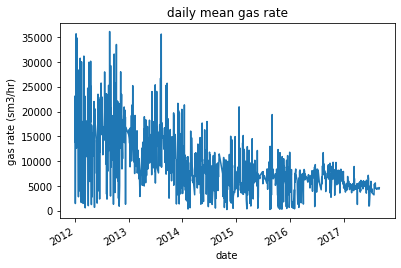

In [9]:
plt.title('daily mean gas rate')
df_train['gasrate'].plot()
plt.ylabel('gas rate (sm3/hr)')

Text(0, 0.5, 'gas rate (sm3/hr)')

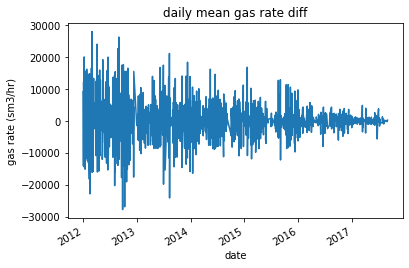

In [10]:
plt.title('daily mean gas rate diff')
df_train['gasrate'].diff().plot()
plt.ylabel('gas rate (sm3/hr)')

Text(0, 0.5, 'log gas rate (-)')

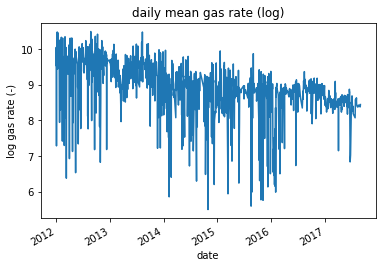

In [11]:
plt.title('daily mean gas rate (log)')
np.log(df_train['gasrate']).plot()
plt.ylabel('log gas rate (-)')

Text(0, 0.5, 'log gas rate diff (-)')

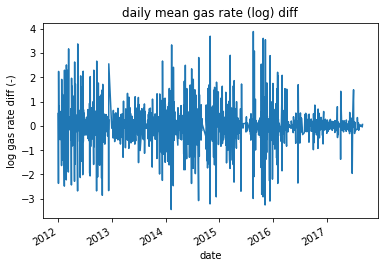

In [12]:
plt.title('daily mean gas rate (log) diff')
np.log(df_train['gasrate']).diff().plot()
plt.ylabel('log gas rate diff (-)')

Text(0, 0.5, 'gas rate (sm3/hr)')

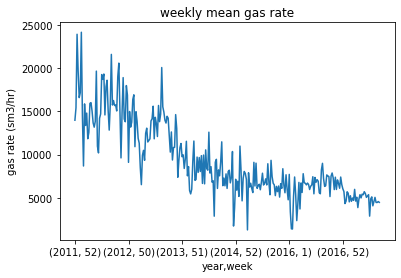

In [13]:
plt.title('weekly mean gas rate')
df_train.groupby(['year', 'week']).mean()['gasrate'].plot()
plt.ylabel('gas rate (sm3/hr)')

Text(0, 0.5, 'gas rate (sm3/hr)')

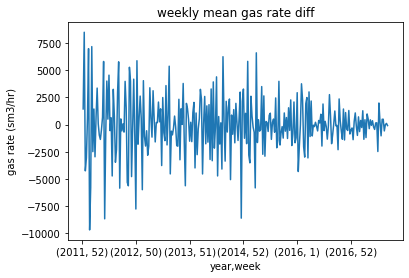

In [14]:
plt.title('weekly mean gas rate diff')
df_train.groupby(['year', 'week']).mean()['gasrate'].diff().plot()
plt.ylabel('gas rate (sm3/hr)')

Text(0, 0.5, 'gas rate (sm3/hr)')

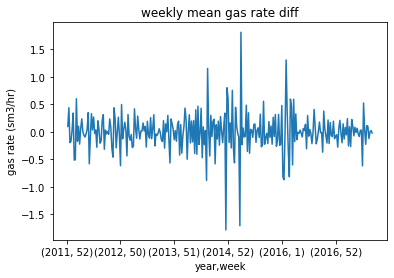

In [15]:
plt.title('weekly mean gas rate diff')
np.log(df_train.groupby(['year', 'week']).mean()['gasrate']).diff().plot()
plt.ylabel('gas rate (sm3/hr)')

Text(0, 0.5, 'gas rate (sm3/hr)')

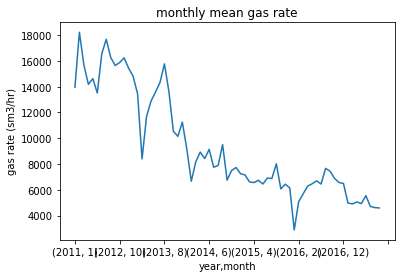

In [16]:
plt.title('monthly mean gas rate')
df_train.groupby(['year', 'month']).mean()['gasrate'].plot()
plt.ylabel('gas rate (sm3/hr)')

Text(0, 0.5, 'gas rate (sm3/hr)')

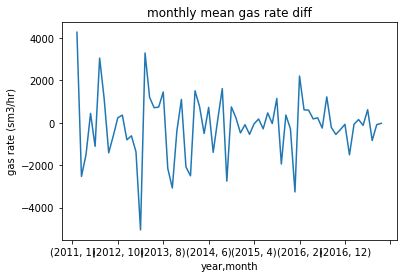

In [17]:
plt.title('monthly mean gas rate diff')
df_train.groupby(['year', 'month']).mean()['gasrate'].diff().plot()
plt.ylabel('gas rate (sm3/hr)')